**Import required libraries for text classification and dataset loading:**

In [1]:
from fastai.text.all import *
from datasets import load_dataset
import pandas as pd
import torch


C:\Users\Chanda Mishra\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Set random seed for reproducibility of results:**

In [2]:
set_seed(42, reproducible=True)
torch.manual_seed(42)


**Load the IMDB movie reviews dataset:**

In [3]:
dataset = load_dataset("imdb")

train_df = pd.DataFrame({
    "text": dataset["train"]["text"],
    "label": dataset["train"]["label"]
})

valid_df = pd.DataFrame({
    "text": dataset["test"]["text"],
    "label": dataset["test"]["label"]
})

train_df["label"] = train_df["label"].map({0:"negative", 1:"positive"})
valid_df["label"] = valid_df["label"].map({0:"negative", 1:"positive"})

train_df.head()


,text,label
0,"I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered ""controversial"" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain politica...",negative
1,"""I Am Curious: Yellow"" is a risible and pretentious steaming pile. It doesn't matter what one's political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn't true. I've seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don't exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies li...",negative
2,"If only to avoid making this type of film in the future. This film is interesting as an experiment but tells no cogent story.<br /><br />One might feel virtuous for sitting thru it because it touches on so many IMPORTANT issues but it does so without any discernable motive. The viewer comes away with no new perspectives (unless one comes up with one while one's mind wanders, as it will invariably do during this pointless film).<br /><br />One might better spend one's time staring out a window at a tree growing.<br /><br />",negative
3,"This film was probably inspired by Godard's Masculin, féminin and I urge you to see that film instead.<br /><br />The film has two strong elements and those are, (1) the realistic acting (2) the impressive, undeservedly good, photo. Apart from that, what strikes me most is the endless stream of silliness. Lena Nyman has to be most annoying actress in the world. She acts so stupid and with all the nudity in this film,...it's unattractive. Comparing to Godard's film, intellectuality has been replaced with stupidity. Without going too far on this subject, I would say that follows from the dif...",negative
4,"Oh, brother...after hearing about this ridiculous film for umpteen years all I can think of is that old Peggy Lee song..<br /><br />""Is that all there is??"" ...I was just an early teen when this smoked fish hit the U.S. I was too young to get in the theater (although I did manage to sneak into ""Goodbye Columbus""). Then a screening at a local film museum beckoned - Finally I could see this film, except now I was as old as my parents were when they schlepped to see it!!<br /><br />The ONLY reason this film was not condemned to the anonymous sands of time was because of the obscenity case spa...",negative


**Sample a smaller subset of training and validation data:**

In [4]:
train_df = train_df.sample(8000, random_state=42)
valid_df = valid_df.sample(2000, random_state=42)


**Create Text DataLoaders from the dataset:**

In [8]:
dls = TextDataLoaders.from_df(
    train_df,
    valid_df=valid_df,
    text_col="text",
    label_col="label",
    seq_len=72,
    bs=32
)


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


**Initialize the text classification model using AWD-LSTM:**

In [9]:
learn = text_classifier_learner(
    dls,
    AWD_LSTM,
    drop_mult=0.5,
    metrics=[accuracy]
)


**Fine-tune the model for sentiment classification:**

In [8]:
learn.fine_tune(1)


epoch,train_loss,valid_loss,accuracy,time
0,0.509207,0.440157,0.801250,48:49


epoch,train_loss,valid_loss,accuracy,time
0,0.387929,0.317804,0.866875,1:12:53


**Generate classification report for model evaluation:**

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()


              precision    recall  f1-score   support

    negative       0.87      0.86      0.87       806
    positive       0.86      0.87      0.87       794

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600



Visualize confusion matrix to analyze predictions:

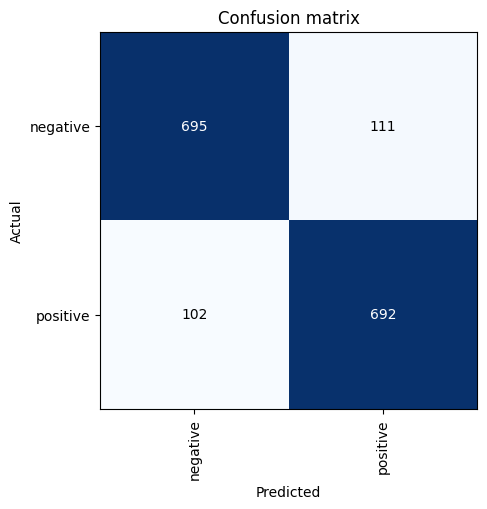

In [10]:
interp.plot_confusion_matrix(figsize=(5,5))


**Save the trained sentiment analysis model:**

In [11]:
learn.save("awd_lstm_ulmfit_sentiment")


Path('models/awd_lstm_ulmfit_sentiment.pth')

In [10]:
learn.load("awd_lstm_ulmfit_sentiment")  


In [11]:
learn.export("awd_lstm_ulmfit_sentiment.pkl")
print(" AWD-LSTM / ULMFiT exported for Streamlit")


 AWD-LSTM / ULMFiT exported for Streamlit
